In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os

# Project folder in Drive
project_dir = "/content/drive/MyDrive/Heart_Disease_Project"

# Go to notebooks folder
os.chdir(os.path.join(project_dir, "notebooks"))
os.listdir()  # Check current files

['02_pca_analysis.ipynb',
 '03_feature_selection.ipynb',
 '01_data_preprocessing.ipynb',
 '04_supervised_learning.ipynb']

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [6]:
df = pd.read_csv(os.path.join(project_dir, "data", "heart_disease_selected.csv"))
print("✅ Cleaned data loaded successfully!")
df.head()

✅ Cleaned data loaded successfully!


,cp_4.0,age,exang,cp_3.0,thalach,thal_7.0,chol,ca,trestbps,oldpeak,target
0,0,0.936181,0.0,0,0.017494,0,-0.276443,0.0,0.750380,1.068965,0
1,1,1.378929,1.0,0,-1.816334,0,0.744555,3.0,1.596266,0.381773,1
2,1,1.378929,1.0,0,-0.899420,1,-0.353500,2.0,-0.659431,1.326662,1
3,0,-1.941680,0.0,1,1.633010,0,0.051047,0.0,-0.095506,2.099753,0
4,0,-1.498933,0.0,0,0.978071,0,-0.835103,0.0,-0.095506,0.295874,0


#Unsupervised Learning - Clustering



In [9]:
X = df.drop('target', axis=1)
y = df['target']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [10]:
inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

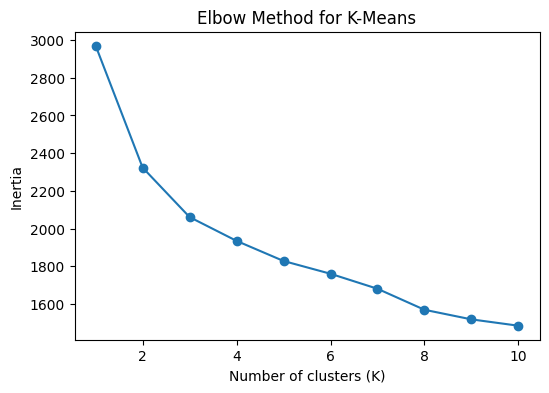

In [11]:
plt.figure(figsize=(6,4))
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for K-Means')
plt.show()

kmeans = KMeans(n_clusters=2, random_state=42)
clusters_kmeans = kmeans.fit_predict(X_scaled)

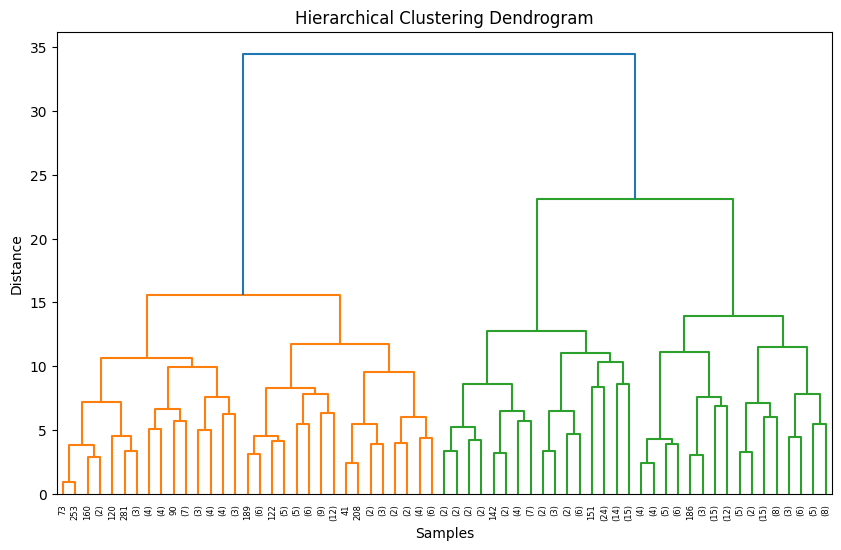

In [12]:
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(X_scaled, method='ward')
plt.figure(figsize=(10, 6))
dendrogram(Z, truncate_mode='level', p=5)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

In [13]:

comparison_df = pd.DataFrame({'Actual': y, 'KMeans Cluster': clusters_kmeans})
print(comparison_df.groupby(['Actual', 'KMeans Cluster']).size())

Actual  KMeans Cluster
0       0                 141
        1                  19
1       0                  36
        1                 101
dtype: int64


In [14]:
!mv "/content/drive/MyDrive/Colab Notebooks/05_unsupervised_learning.ipynb" "/content/drive/MyDrive/Heart_Disease_Project/notebooks/05_unsupervised_learning.ipynb"
